In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.3 MB/s et

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
import gradio as gr


In [ ]:
!unzip "archive.zip"

Archive:  archive.zip
  inflating: 500_Person_Gender_Height_Weight_Index.csv  


In [ ]:
data = pd.read_csv('/content/500_Person_Gender_Height_Weight_Index.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [ ]:
data.replace({"Male":0, "Female":1}, inplace = True)

In [ ]:
data.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  500 non-null    int64
 1   Height  500 non-null    int64
 2   Weight  500 non-null    int64
 3   Index   500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


In [ ]:
# Example for classification

X = data.drop('Index', axis=1)
y = data['Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_test.value_counts()

Index
5    39
4    30
2    18
3     8
1     4
0     1
Name: count, dtype: int64

In [ ]:
# For classification
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# For regression
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
# For classification
y_pred = clf.predict(X_test)

# For regression
y_pred = reg.predict(X_test)


In [ ]:
# For classification
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# For regression
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Accuracy: 0.86
Mean Squared Error: 0.17


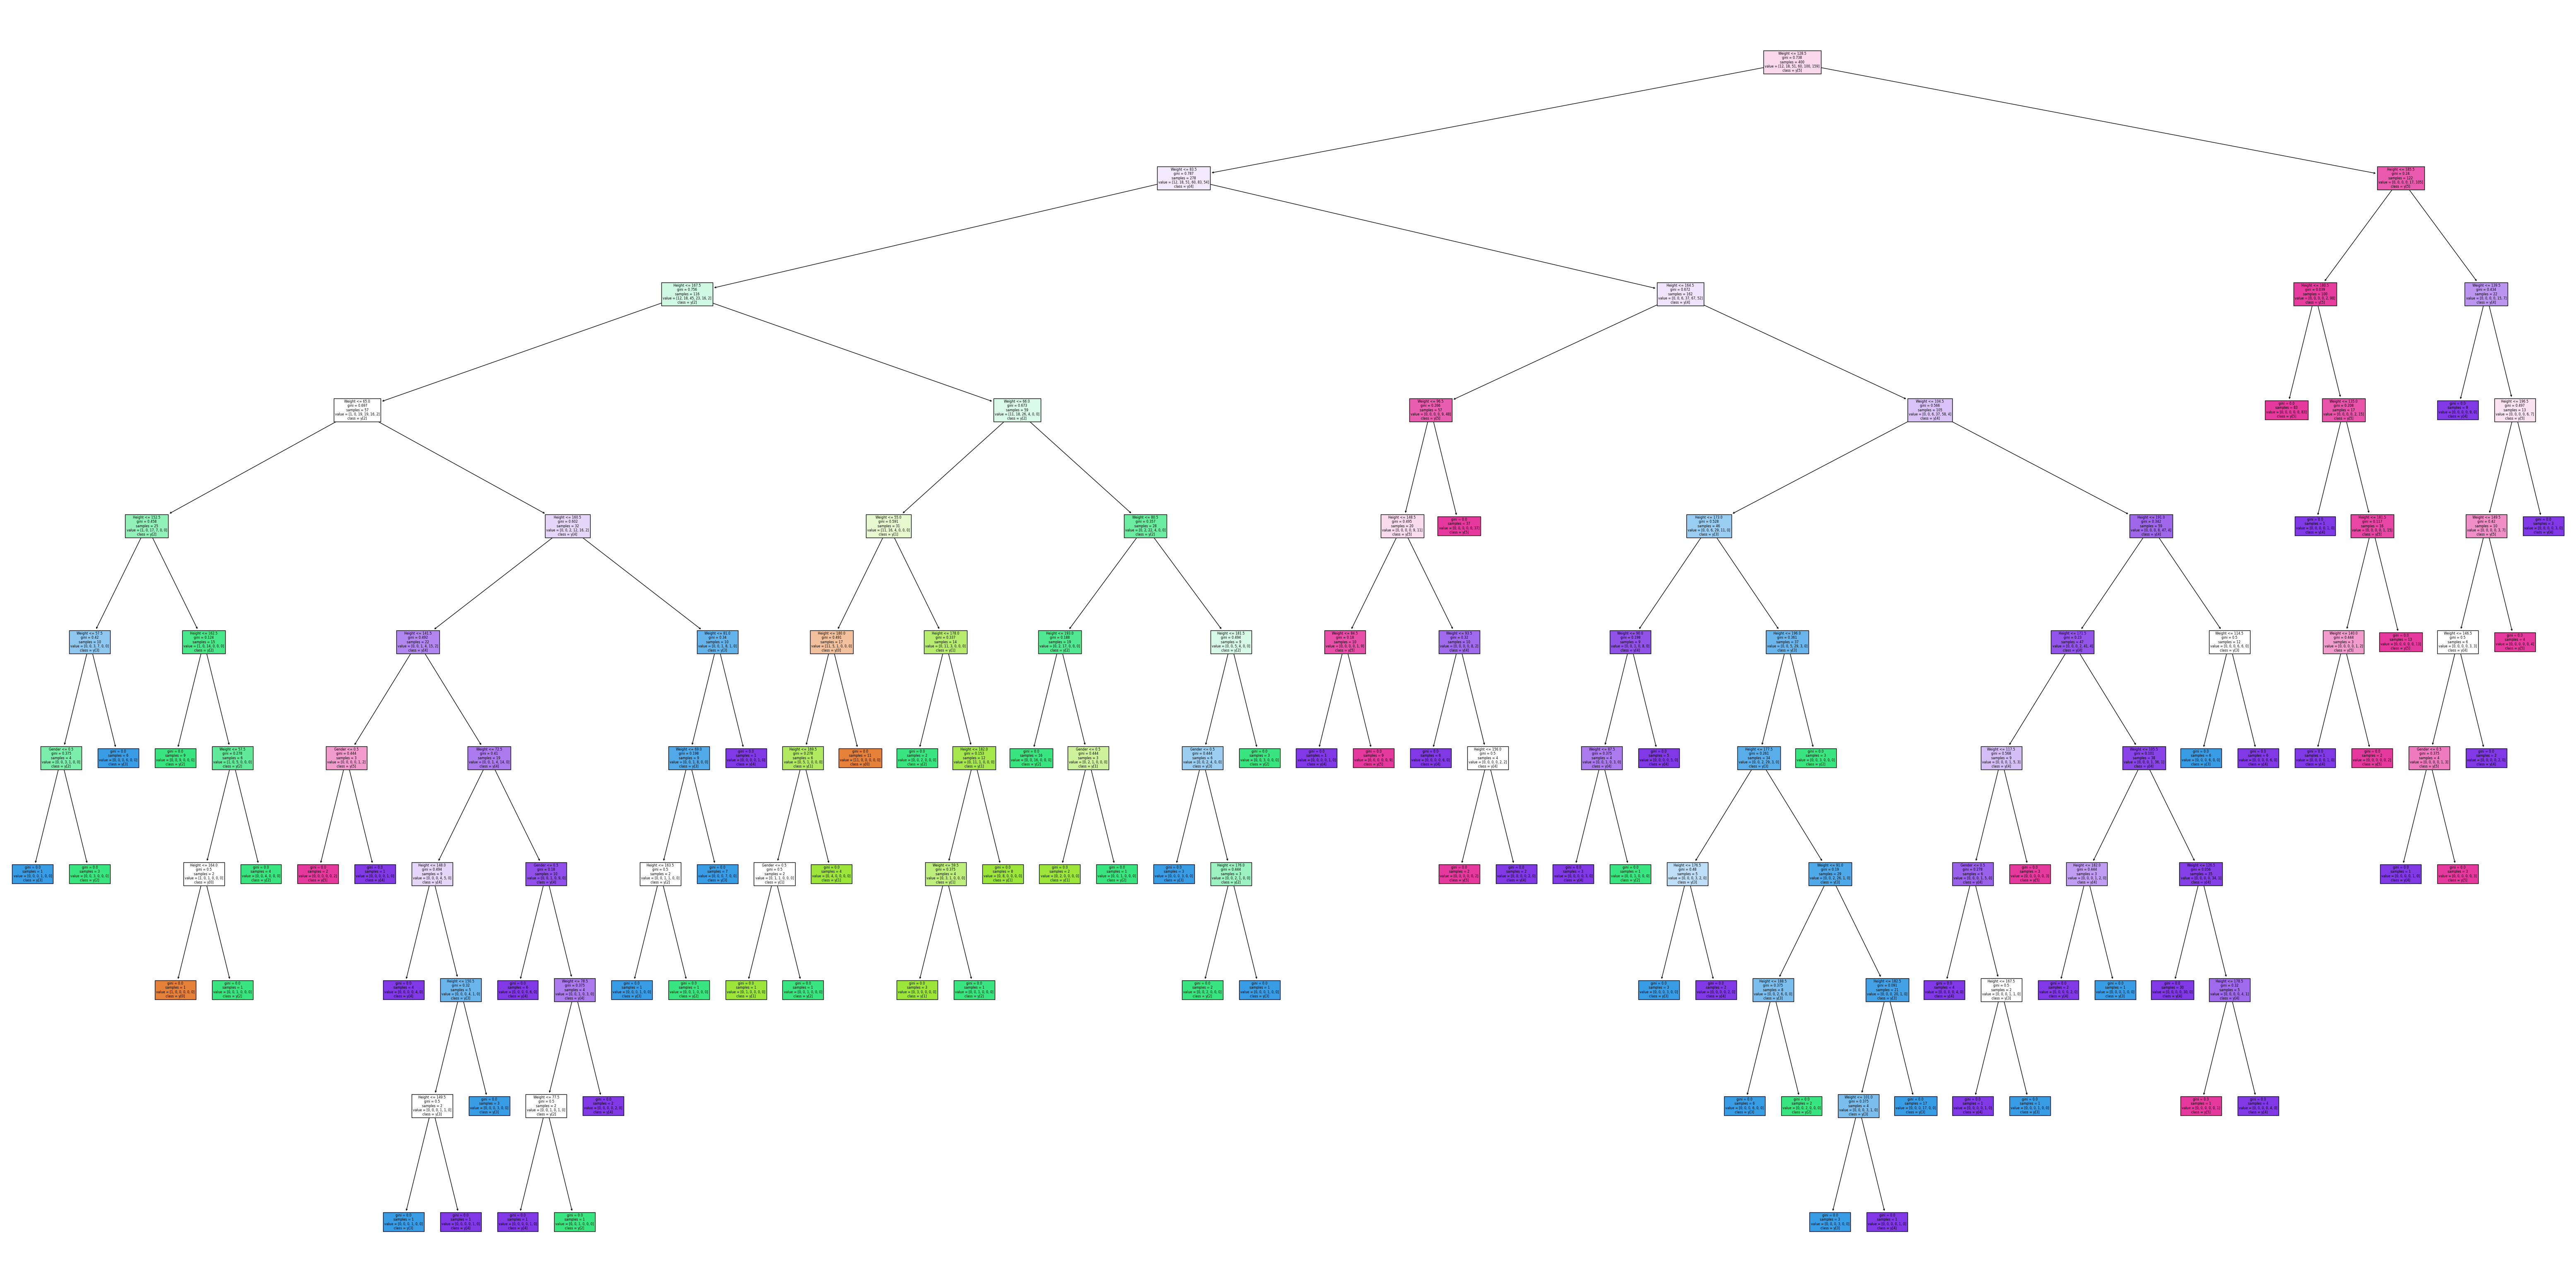

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(80,40))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True)
plt.show()


**Our Decision Tree model is done!**

In [ ]:
import pandas as pd

def add_user_data(gender, height, weight, df=None):
    """
    Adds a user's Gender, Height, and Weight into a DataFrame.

    Parameters:
        gender (str): The gender of the user.
        height (float): The height of the user in centimeters.
        weight (float): The weight of the user in kilograms.
        df (pd.DataFrame, optional): The DataFrame to which the data will be added. If None, a new DataFrame will be created.

    Returns:
        pd.DataFrame: The updated DataFrame with the new user data added.
    """

    # Create a dictionary with the new user data
    user_data = {'Gender': [gender], 'Height': [height], 'Weight': [weight]}

    # Convert the dictionary to a DataFrame
    user_df = pd.DataFrame(user_data)

    # If df is None, create a new DataFrame
    if df is None:
        df = user_df
    else:
        # Append the new user data to the existing DataFrame
        df = pd.concat([df, user_df], ignore_index=True)

    return df



In [ ]:
df = add_user_data(0, 175, 130)

df = add_user_data(1, 165, 60, df)
print(df)


   Gender  Height  Weight
0       0     175     130
1       1     165      60


In [ ]:
clf.predict(df)

array([5, 2])

In [ ]:
data[data['Height']==175]

,Gender,Height,Weight,Index
40,1,175,120,4
64,0,175,135,5
86,1,175,141,5
457,1,175,83,2


In [ ]:
cm = confusion_matrix(y_test, y_pred)


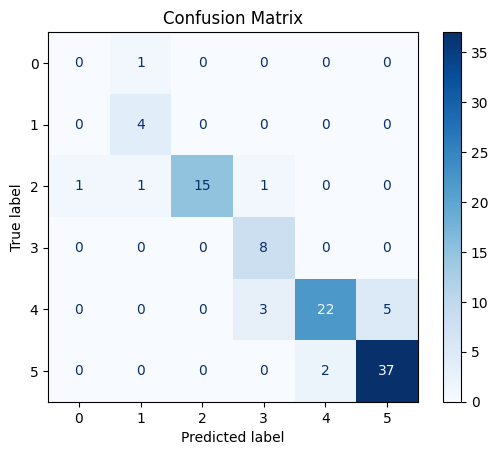

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
def advice(Gender, Height, Weight):
  df = add_user_data(Gender, Height, Weight)
  result = clf.predict(df)
  if result[0]==0:
    a = "Extremely Weak"
  elif result[0]==1:
    a = "Weak"
  elif result[0]==2:
    a = 'Normal'
  elif result[0]==3:
    a = 'Overweght'
  elif result[0]==4:
    a = 'Obesity'
  else:
    a = 'Extreme Obesity'
  return a

In [ ]:
advice(0, 178, 58)

'Normal'